In [66]:
#QUESTION:   Can we forecast alcohol sales in Ames for the YEAR 
#Iowa State University

#Data is Aug - Dec for 2012 - 2018

In [67]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import statsmodels.api as sm

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter('ignore')


In [68]:
#retrieve the csv from the first step
cityData = read_csv('data/ames2.csv',parse_dates=[1])

### Clean the data

In [69]:
cityData.head()

,Unnamed: 0,Date,Sale_Dollars
0,0,2013-11-06,148.44
1,1,2014-10-22,28.50
2,2,2013-12-24,49.48
3,3,2013-12-30,69.92
4,4,2014-08-13,28.96


In [70]:
cityData = cityData.drop('Unnamed: 0', axis=1)

In [71]:

#change the month datatype
#https://stackoverflow.com/questions/11376080/plot-numpy-datetime64-with-matplotlib
#series['Date'] = pd.to_datetime(series['Date'])

In [72]:
cityData.dtypes

Date            datetime64[ns]
Sale_Dollars           float64
dtype: object

#### The data must be grouped by year, and sorted in descending order

In [73]:
#create a new column which is only the month and year
#begin by creating a new df in case I have to go back
cityData1 = cityData

#add the new column
cityData1['Year'] = pd.to_datetime(cityData1['Date']).dt.to_period('Y')

#display the df
cityData1.head()

,Date,Sale_Dollars,Year
0,2013-11-06,148.44,2013
1,2014-10-22,28.50,2014
2,2013-12-24,49.48,2013
3,2013-12-30,69.92,2013
4,2014-08-13,28.96,2014


In [74]:
#in order to use the df for the model, group all sales by the monthYear.    The Date column will no longer be needed
cityData2 = cityData1.groupby("Year").agg({"Sale_Dollars":'sum'})
cityData2.head()

#NOTE:   this df will be used for the 2nd and 3rd parts of the model.  Do not overwrite the df.
#The 1st part of the model will used the date in an object format (not datetime format).  

,Sale_Dollars
Year,
2012,3509585.36
2013,3339555.67
2014,3696197.13
2015,3621503.72
2016,3777547.44


In [75]:
#make the index a column
cityData3 = cityData2.rename_axis('Year').reset_index()
cityData3.head()

,Year,Sale_Dollars
0,2012,3509585.36
1,2013,3339555.67
2,2014,3696197.13
3,2015,3621503.72
4,2016,3777547.44


In [76]:
cityData3.dtypes

Year            period[A-DEC]
Sale_Dollars          float64
dtype: object

###    Two datatypes.0
There are three parts to the ARIMA model.    
<br> The 1st requires the date be an object datatype (not datetype).   The cityFormat dataframe is created for this piece.

#### cityDateObj2 is the df where the datetime is an object

In [77]:
cityDateObj = cityData3

In [78]:
#Begin by adding  new columns which will contain the month and day as an object.
cityDateObj['YearStr'] = cityData3['Year'].dt.strftime('%Y')

In [79]:
cityDateObj.head()

,Year,Sale_Dollars,YearStr
0,2012,3509585.36,2012
1,2013,3339555.67,2013
2,2014,3696197.13,2014
3,2015,3621503.72,2015
4,2016,3777547.44,2016


In [80]:
cityDateObj.dtypes

Year            period[A-DEC]
Sale_Dollars          float64
YearStr                object
dtype: object

In [81]:
#Create a new df with ONLY the date as an object and the sales
cityDateObj2 = cityDateObj[['YearStr', 'Sale_Dollars']].copy()

In [82]:
cityDateObj2.head()

,YearStr,Sale_Dollars
0,2012,3509585.36
1,2013,3339555.67
2,2014,3696197.13
3,2015,3621503.72
4,2016,3777547.44


In [83]:
cityDateObj2.dtypes

YearStr          object
Sale_Dollars    float64
dtype: object

###   ARIMA MODEL

  YearStr  Sale_Dollars
0    2012    3509585.36
1    2013    3339555.67
2    2014    3696197.13
3    2015    3621503.72
4    2016    3777547.44


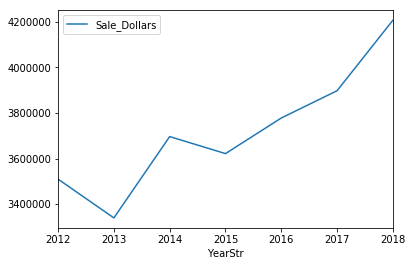

In [84]:
#This model needs an object for the date; therefore, use the cityDateObj2 df.

print(cityDateObj2.head())
cityDateObj2.plot(x='YearStr',y='Sale_Dollars')
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:         D.Sale_Dollars   No. Observations:                    6
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -78.905
Method:                       css-mle   S.D. of innovations         110549.072
Date:                Sat, 03 Aug 2019   AIC                            165.810
Time:                        18:37:31   BIC                            164.977
Sample:                    12-31-2013   HQIC                           162.476
                         - 12-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.234e+05    2.4e+04      5.140      0.014    7.63e+04     1.7e+05
ar.L1.D.Sale_Dollars    -1.0107      0.509     -1.985      0.141      -2.009      -0.013
ar.L2.D.Sale

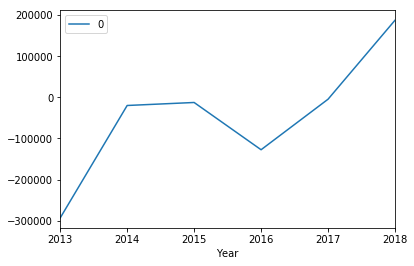

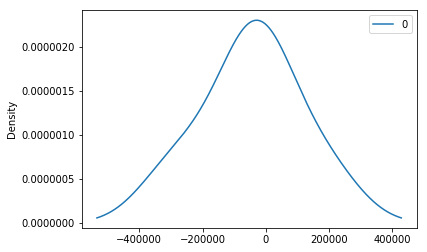

                   0
count       6.000000
mean   -45122.353405
std    158659.725098
min   -293416.511070
25%   -100655.856520
50%    -16266.197039
75%     -6650.866622
max    187446.284212


In [85]:
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
from pandas import DataFrame
import statsmodels.api as sm

#This model needs a datetime format for the date; therefore, use the cityData2 df.

# fit model
#Originally, order was 3,1,0.  Changed to 2,1,0 to get past an error
model = ARIMA(cityData2, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=3924700.157175, expected=3777547.440000
predicted=3807631.111389, expected=3897217.360000
predicted=3982442.981729, expected=4206209.450000
Test MSE: 26583683478.119


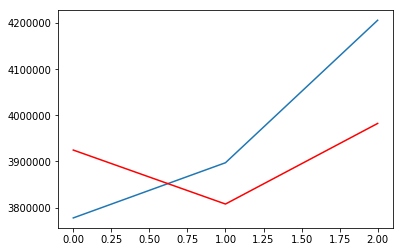

In [86]:
from sklearn.metrics import mean_squared_error

#This model needs a datetime format for the date; therefore, use the cityData2 df.

#Originally, order was 3,1,0.  Changed to 2,1,0 and still an error
#changed to 1,1,0 and no error

X = cityData2.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()